# Question 1

### Part 1

### Assumptions
QDA: Data assumed to be normally distributed \
QDA: Each class has its own covariance matrix \
LDA: All classes has identical covariance matricies 

This paper carries out a large dimensional analysis of the standard regularized quadratic discriminant analysis (QDA) classifier designed on the assumption that data arise from a Gaussian mixture model. The analysis relies on fundamental results from random matrix theory (RMT) when both the number of features and the cardinality of the training data within each class grow large at the same pace. Under some mild assumptions, we show that the asymptotic classification error converges to a deterministic quantity that depends only on the covariances and means associated with each class as well as the problem dimensions. Such a result permits a better understanding of the performance of regularized QDA and can be used to determine the optimal regularization parameter that minimizes the misclassification error probability. Despite being valid only for Gaussian data, our theoretical findings are shown to yield a high accuracy in predicting the performances achieved with real data sets drawn from popular real data bases, thereby making an interesting connection between theory and practice.

https://scikit-learn.org/stable/auto_examples/classification/plot_lda_qda.html#sphx-glr-auto-examples-classification-plot-lda-qda-py

### Generate and plot data  

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: covariance is not positive-semidefinite.


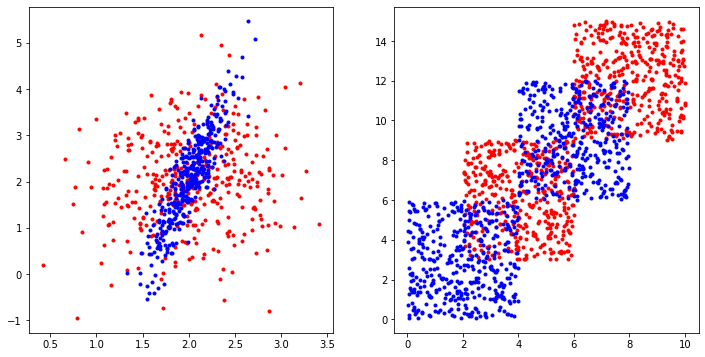

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import sklearn


MEANS = [2,2,2,2]
N = 500
COVARIANCES = [[[0.1, 0.5],[0.2, 0.9]], [[0.2, 0.8],[-0.2, 0.6]],[[0.2, 0.8],[-0.2, 0.6]],[[0.2, 0.8],[-0.2, 0.6]]]
min_max = np.array([[0, 4], [2, 6], [4, 8], [6,10]])
scales = np.array([1,10])
X_normal = []
y_normal = []
X_uniform = []
y_uniform = []
data_normal = []
data_uniform = []
C = 4
for j in range(C):
    cov = COVARIANCES[j]
    mean = MEANS[j]
    minimum = min_max[j,0]
    maximum = min_max[j,1]
    label = int(j%2 == 0)
    if j < 2:
        x_normal, Y_normal = np.random.multivariate_normal([mean, mean],cov, N).T
    
    x_uniform, Y_uniform = np.random.uniform(minimum, maximum, size=N), np.random.uniform(minimum*1.5, maximum*1.5, size=N)
    #x, Y = np.random.exponential(size = N,scale = scales[j]), np.random.exponential(size = N, scale = scales[j])
    for i in range(N):
        if j < 2: 
            data_normal.append([x_normal[i], Y_normal[i], label])  
        data_uniform.append([x_uniform[i], Y_uniform[i], label])  
data_normal = np.array(data_normal)
data_uniform = np.array(data_uniform)      
np.random.shuffle(data_normal)
np.random.shuffle(data_uniform)
X_normal = data_normal[:,:2]
y_normal = data_normal[:,2]
X_normal_train = X_normal[:int(X_normal.size/2*0.8)]
y_normal_train = y_normal[:int(X_normal.size/2*0.8)]
X_normal_test = X_normal[int(X_normal.size/2*0.8):]
y_normal_test = y_normal[int(X_normal.size/2*0.8):]
X_uniform = data_uniform[:,:2]
y_uniform = data_uniform[:,2]
X_uniform_train = X_uniform[:int(X_uniform.size/2*0.8)]
y_uniform_train = y_uniform[:int(X_uniform.size/2*0.8)]
X_uniform_test = X_uniform[int(X_uniform.size/2*0.8):]
y_uniform_test = y_uniform[int(X_uniform.size/2*0.8):]

plt.figure(figsize=(12, 6))

plt.subplot(1,2,1)
plt.scatter(X_normal_train[y_normal_train == 0,0],X_normal_train[y_normal_train == 0,1], marker=".", color="red")
plt.scatter(X_normal_train[y_normal_train == 1,0],X_normal_train[y_normal_train == 1,1], marker=".", color="blue")

plt.subplot(1,2,2)
plt.scatter(X_uniform_train[y_uniform_train == 0,0],X_uniform_train[y_uniform_train == 0,1], marker=".", color="red")
plt.scatter(X_uniform_train[y_uniform_train == 1,0],X_uniform_train[y_uniform_train == 1,1], marker=".", color="blue")


### QDA model

accuracy normal: 0.88
accuracy uniform: 0.5625


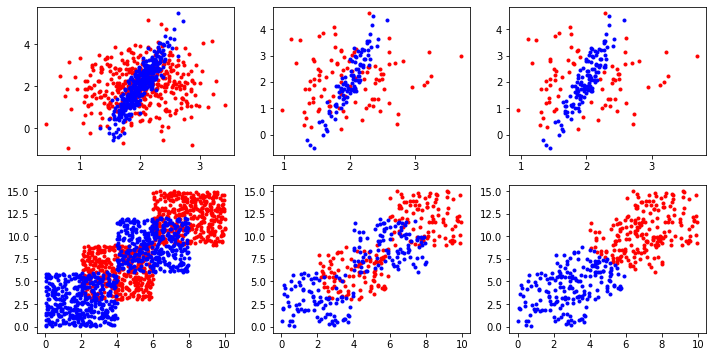

In [ ]:

qda = QDA()
predictions_normal = qda.fit(X_normal_train,y_normal_train).predict(X_normal_test)
predictions_uniform = qda.fit(X_uniform_train,y_uniform_train).predict(X_uniform_test)


predicted_0_normal = np.where(predictions_normal == 0)
predicted_1_normal = np.where(predictions_normal == 1)

predicted_0_uniform = np.where(predictions_uniform == 0)
predicted_1_uniform = np.where(predictions_uniform == 1)

plt.figure(figsize=(12, 6))

plt.subplot(231)
plt.scatter(X_normal_train[y_normal_train == 0,0],X_normal_train[y_normal_train == 0,1], marker=".", color="red")
plt.scatter(X_normal_train[y_normal_train == 1,0],X_normal_train[y_normal_train == 1,1], marker=".", color="blue")

plt.subplot(232)
plt.scatter(X_normal_test[y_normal_test == 0,0],X_normal_test[y_normal_test == 0,1],marker=".", color="red")
plt.scatter(X_normal_test[y_normal_test == 1,0],X_normal_test[y_normal_test == 1,1],marker=".", color="blue" )

plt.subplot(233)
plt.scatter(X_normal_test[predicted_0_normal,0],X_normal_test[predicted_0_normal,1],marker=".", color="red" )
plt.scatter(X_normal_test[predicted_1_normal,0],X_normal_test[predicted_1_normal,1],marker=".", color="blue" )

plt.subplot(234)
plt.scatter(X_uniform_train[y_uniform_train == 0,0],X_uniform_train[y_uniform_train == 0,1], marker=".", color="red")
plt.scatter(X_uniform_train[y_uniform_train == 1,0],X_uniform_train[y_uniform_train == 1,1], marker=".", color="blue")

plt.subplot(235)
plt.scatter(X_uniform_test[y_uniform_test == 0,0],X_uniform_test[y_uniform_test == 0,1],marker=".", color="red")
plt.scatter(X_uniform_test[y_uniform_test == 1,0],X_uniform_test[y_uniform_test == 1,1],marker=".", color="blue" )

plt.subplot(236)
plt.scatter(X_uniform_test[predicted_0_uniform,0],X_uniform_test[predicted_0_uniform,1],marker=".", color="red" )
plt.scatter(X_uniform_test[predicted_1_uniform,0],X_uniform_test[predicted_1_uniform,1],marker=".", color="blue" )

print(f"accuracy normal: {len(np.where(predictions_normal == y_normal_test)[0])/X_normal_test[:,0].size}")
print(f"accuracy uniform: {len(np.where(predictions_uniform == y_uniform_test)[0])/X_uniform_test[:,0].size}")

### CART model

accuracy normal: 0.77
accuracy uniform: 0.7725


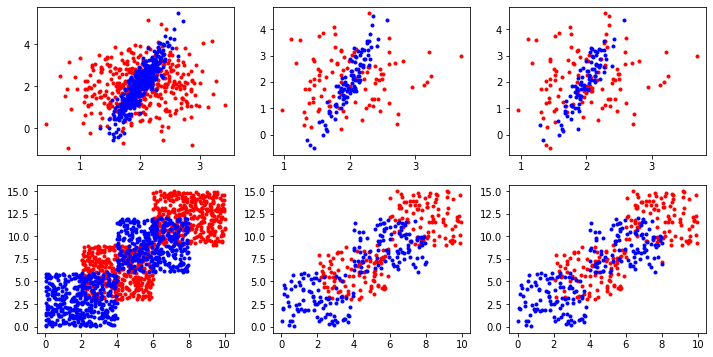

In [ ]:
from sklearn import tree

cart = tree.DecisionTreeRegressor()
predictions_normal = cart.fit(X_normal_train,y_normal_train).predict(X_normal_test)
predictions_uniform = cart.fit(X_uniform_train,y_uniform_train).predict(X_uniform_test)

predicted_0_normal = np.where(predictions_normal == 0)
predicted_1_normal = np.where(predictions_normal == 1)

predicted_0_uniform = np.where(predictions_uniform == 0)
predicted_1_uniform = np.where(predictions_uniform == 1)

plt.figure(figsize=(12, 6))

plt.subplot(231)
plt.scatter(X_normal_train[y_normal_train == 0,0],X_normal_train[y_normal_train == 0,1], marker=".", color="red")
plt.scatter(X_normal_train[y_normal_train == 1,0],X_normal_train[y_normal_train == 1,1], marker=".", color="blue")

plt.subplot(232)
plt.scatter(X_normal_test[y_normal_test == 0,0],X_normal_test[y_normal_test == 0,1],marker=".", color="red")
plt.scatter(X_normal_test[y_normal_test == 1,0],X_normal_test[y_normal_test == 1,1],marker=".", color="blue" )

plt.subplot(233)
plt.scatter(X_normal_test[predicted_0_normal,0],X_normal_test[predicted_0_normal,1],marker=".", color="red" )
plt.scatter(X_normal_test[predicted_1_normal,0],X_normal_test[predicted_1_normal,1],marker=".", color="blue" )

plt.subplot(234)
plt.scatter(X_uniform_train[y_uniform_train == 0,0],X_uniform_train[y_uniform_train == 0,1], marker=".", color="red")
plt.scatter(X_uniform_train[y_uniform_train == 1,0],X_uniform_train[y_uniform_train == 1,1], marker=".", color="blue")

plt.subplot(235)
plt.scatter(X_uniform_test[y_uniform_test == 0,0],X_uniform_test[y_uniform_test == 0,1],marker=".", color="red")
plt.scatter(X_uniform_test[y_uniform_test == 1,0],X_uniform_test[y_uniform_test == 1,1],marker=".", color="blue" )

plt.subplot(236)
plt.scatter(X_uniform_test[predicted_0_uniform,0],X_uniform_test[predicted_0_uniform,1],marker=".", color="red" )
plt.scatter(X_uniform_test[predicted_1_uniform,0],X_uniform_test[predicted_1_uniform,1],marker=".", color="blue" )

print(f"accuracy normal: {len(np.where(predictions_normal == y_normal_test)[0])/X_normal_test[:,0].size}")
print(f"accuracy uniform: {len(np.where(predictions_uniform == y_uniform_test)[0])/X_uniform_test[:,0].size}")

##### 1. Simulate training and test data that follows the assumptions for each of the two models. (QDA, CART)


##### 2. What are your expectations on the test error if you were to apply QDA to data simulated for CART and vice versa?
More assumptions in QDA are expected to make accuracy better if assumptions are met. Generalised method that does not require assumptions (CART) are expected to perform better if assumptionds for QDA are not met.  

##### 3. Train the methods on both training data sets and compare their respective test errors for each dataset. Were your expectations from Step 2 correct? Any surprises? Discuss
No we have a very good lecturer so we knew the answers in advanced because we pay so much attention on lectures and read books about statistics in our spare time and have statistics-nights where we gather friends to discuss statistical models. 

##### 4. Taking what you have learned from the project so far, can you simulate data for which the target method works best? (Clarifying example: Data simulated for QDA should be classified best by QDA and less well CART, and the other way around)


### Part 2

### Import data

  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33 

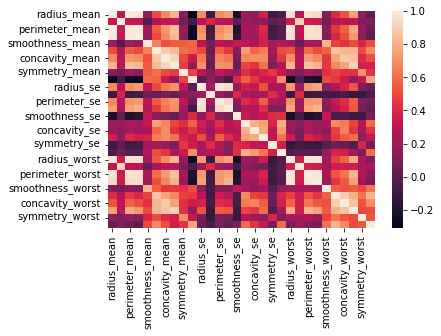

<Figure size 2160x2160 with 0 Axes>

In [ ]:

import seaborn as sn
import matplotlib.pyplot as plt
# Load UCI breast cancer dataset with column names and remove ID column
uci_bc_data = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data", 
    sep=",",
    header=None,
    names=[
        "id_number", "diagnosis", "radius_mean",
        "texture_mean", "perimeter_mean", "area_mean",
        "smoothness_mean", "compactness_mean",
        "concavity_mean","concave_points_mean",
        "symmetry_mean", "fractal_dimension_mean",
        "radius_se", "texture_se", "perimeter_se",
        "area_se", "smoothness_se", "compactness_se",
        "concavity_se", "concave_points_se",
        "symmetry_se", "fractal_dimension_se",
        "radius_worst", "texture_worst",
        "perimeter_worst", "area_worst",
        "smoothness_worst", "compactness_worst",
        "concavity_worst", "concave_points_worst",
        "symmetry_worst", "fractal_dimension_worst"
    ],).drop("id_number", axis=1)

y = uci_bc_data.diagnosis.map({"B": 0, "M": 1}).to_numpy()
X = uci_bc_data.drop("diagnosis", axis=1).to_numpy()
print(uci_bc_data.head())
print(f"Number class B: {y.tolist().count(0)}, Number class M: {y.tolist().count(1)}")
correlations = uci_bc_data.corr()
sn.heatmap(correlations)
plt.figure(figsize=(30,30))
plt.show()


##### 1. Are they numerical or categorical?

    Numerical

##### 2. Do they have highly varying scales? Should data be scaled/normalized/centred before being used in a classification method? (More on this in lecture 5)



##### 3. How does the correlation matrix between the features look like? Are there highly correlated features? Are there plausible reasons for the correlations?


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

def randomize_column_fold(number_columns):
    columns = uci_bc_data.columns.values.tolist()
    random_columns = np.random.choice(columns, number_columns, replace=False)
    data = uci_bc_data[random_columns]
    data[label] = y
    return np.array(data.values.tolist(), dtype=float)

n_columns = 4

def split_to_folds(data,n_folds):
    X = data.drop("diagnosis", axis=1).to_numpy()
    y = data.diagnosis.map({"B": 0, "M": 1}).to_numpy()
    X_folds = np.array_split(X, n_folds)
    y_folds = np.array_split(y, n_folds)
    return X_folds, y_folds 


X_folds, y_folds = split_to_folds(uci_bc_data,5)

def test_folds(X_folds, y_folds):
    cart = tree.DecisionTreeRegressor()
    lr = LDA()
    pred = []
    precision = []
    recall = []
    f1 = []
    accuracy = []
    predLR = []
    precisionLR = []
    recallLR = []
    f1LR = []
    accuracyLR = []
    for i in range (len(X_folds)):
        temp_X = X_folds.copy()
        temp_y = y_folds.copy()
        X_test = temp_X.pop(i)
        y_test = temp_y.pop(i)
        X_train = [item for sublist in temp_X for item in sublist]
        y_train = [item for sublist in temp_y for item in sublist]
        predictions = cart.fit(X_train,y_train).predict(X_test).tolist()
        predictionsLR = lr.fit(X_train,y_train).predict(X_test).tolist()

        precision.append(precision_score(y_test,predictions))
        recall.append(recall_score(y_test,predictions))
        f1.append(f1_score(y_test,predictions))
        accuracy.append(accuracy_score(y_test,predictions))
        
        precisionLR.append(precision_score(y_test,predictionsLR))
        recallLR.append(recall_score(y_test,predictionsLR))
        f1LR.append(f1_score(y_test,predictionsLR))
        accuracyLR.append(accuracy_score(y_test,predictionsLR))

        pred.append((predictions == y_test).tolist().count(1)/len(y_test))
        predLR.append((predictionsLR == y_test).tolist().count(1)/len(y_test))
        
    print(f'Precision : {sum(precision)/len(precision)}')
    print(f'Recall : {sum(recall)/len(recall)}')
    print(f'F1 : {sum(f1)/len(f1)}')
    print(f'Accuracy : {sum(accuracy)/len(accuracy)}')
    print('---------------------------------------')
    print(f'Precision : {sum(precisionLR)/len(precisionLR)}')
    print(f'Recall : {sum(recallLR)/len(recallLR)}')
    print(f'F1 : {sum(f1LR)/len(f1LR)}')
    print(f'Accuracy : {sum(accuracyLR)/len(accuracyLR)}')


test_folds(X_folds, y_folds)

Precision : 0.8537535885809341
Recall : 0.9081477736983388
F1 : 0.8743156310012263
Accuracy : 0.9137866790870983
---------------------------------------
Precision : 0.9887213114754099
Recall : 0.9056179925551122
F1 : 0.9448621026416404
Accuracy : 0.9578481602235678


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

def split_to_strategy_folds(data,n_folds):
    M_objects = data[data["diagnosis"] == "M"]
    B_objects = data[data["diagnosis"] == "B"]
    X_M = M_objects.drop("diagnosis", axis=1).to_numpy()
    X_B = B_objects.drop("diagnosis", axis=1).to_numpy()
    y_M = M_objects.diagnosis.map({"B": 0, "M": 1}).to_numpy()
    y_B = B_objects.diagnosis.map({"B": 0, "M": 1}).to_numpy() 
    X_M_folds = np.array_split(X_M, n_folds)
    X_B_folds = np.array_split(X_B, n_folds)
    y_M_folds = np.array_split(y_M, n_folds)
    y_B_folds = np.array_split(y_B, n_folds)
    X_folds = []
    y_folds = []
    for i in range(n_folds):
       X_folds.append(X_M_folds[i].tolist()+X_B_folds[i].tolist())
       y_folds.append(y_M_folds[i].tolist()+y_B_folds[i].tolist())
    return X_folds, y_folds 


X_folds, y_folds = split_to_strategy_folds(uci_bc_data,5)

def test_folds(X_folds, y_folds):
    cart = tree.DecisionTreeRegressor()
    pred = []
    precision = []
    recall = []
    f1 = []
    accuracy = []
    for i in range (len(X_folds)):
        temp_X = X_folds.copy()
        temp_y = y_folds.copy()
        X_test = temp_X.pop(i)
        y_test = temp_y.pop(i)
        X_train = [item for sublist in temp_X for item in sublist]
        y_train = [item for sublist in temp_y for item in sublist]
        predictions = cart.fit(X_train,y_train).predict(X_test).tolist()
        precision.append(precision_score(y_test,predictions))
        recall.append(recall_score(y_test,predictions))
        f1.append(f1_score(y_test,predictions))
        accuracy.append(accuracy_score(y_test,predictions))


    print(f'Precision : {sum(precision)/len(precision)}')
    print(f'Recall : {sum(recall)/len(recall)}')
    print(f'F1 : {sum(f1)/len(f1)}')
    
    print(f'Accuracy : {sum(accuracy)/len(accuracy)}')

test_folds(X_folds, y_folds)

Precision : 0.8708767010129994
Recall : 0.9152823920265781
F1 : 0.890526345342459
Accuracy : 0.915659869180454


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f98e27f7-6444-4cf3-8fec-73bc47540f9b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>